# Модули Python для визуализации данных

Разумеется, визуализация не ограничивается pandas и matplotlib, на котором pandas работает. Библиотек существует много. Преимущественно они действительно работают на matplotlib, но есть и самостоятельные решения.

В Python возможны следующие способы визуализации:


*   распределение данных (гистограммы, графики плотности, ящиковые диаграммы)
*   корреляции (диаграмма рассеяния, корреляционная матрица)
*   ранжирование (столбиковые диаграммы, облако слов)
*   отношение части к целому (диаграммы Венна, "пончик" и "пирог", дендрограммы)
*   развитие событий (графики функций, диаграммы с областями)
*   карты (географические)
*   потоки данных (всевозможные графы)

Дополнительно можно сделать визуализацию анимированной, интерактивной или в 3D.

По [ссылочке](https://www.python-graph-gallery.com) можно найти все это с примерами.



О том, что и когда логично использовать, в **Лекции 3** (*#TODO*). Посмотрим перечисленные примеры визуализации на некоторых библиотеках.

## Оценка данных (дополнение к предобработке)

Производить оценку данных на предмет наобходимости предобработки - муторно. Надо проверять слишком много данных. Чтобы несколько облегчить себе жизнь, можно воспользоваться модулем missingno, который визуализирует недостатки данных. [Ссылочка](https://github.com/ResidentMario/missingno) на документацию модуля.

In [ ]:
!pip install missingno

Визуализируем датасет про [вакцинацию от COVID](https://drive.google.com/file/d/1TtQ6_A5XQ0nBuyuC1EsJuPi0D70LMwS1/view?usp=sharing).

missingno работает от matplotlib, не забываем его тоже подгружать.

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
covid = pd.read_csv("country_vaccinations.csv")
covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


missingno может визуализировать до 50 столбцов. Посмотрим, подходит ли наш датасет.

In [ ]:
covid.shape

(5321, 15)

Подходит.

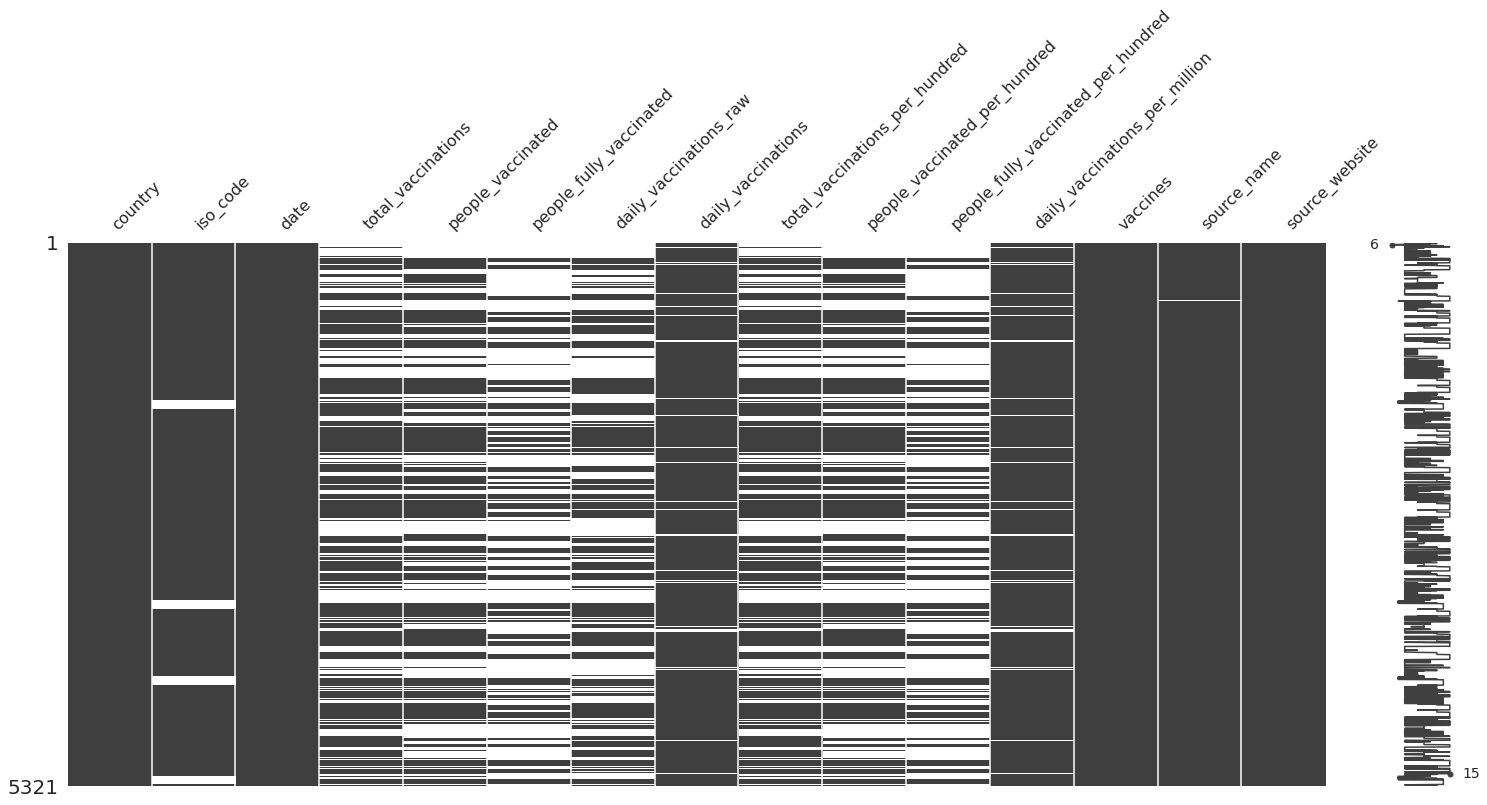

In [ ]:
msno.matrix(covid);

Сразу видно, что в столбцах country, date, vaccines, source_website пропусков нет. В iso_code, daily_vaccinations, daily_vaccinations_per_million, source_name пустые ячейки есть, но их сравнительно немного относительно остальных столбцов - значит, и обработать это будет проще. Числа 6 и 15 в крайнем правом столбце означают, что минимальное количество заполненных ячеек в строке - 6, максимальное -15.

Можно посмотреть на ситуацию в числах.

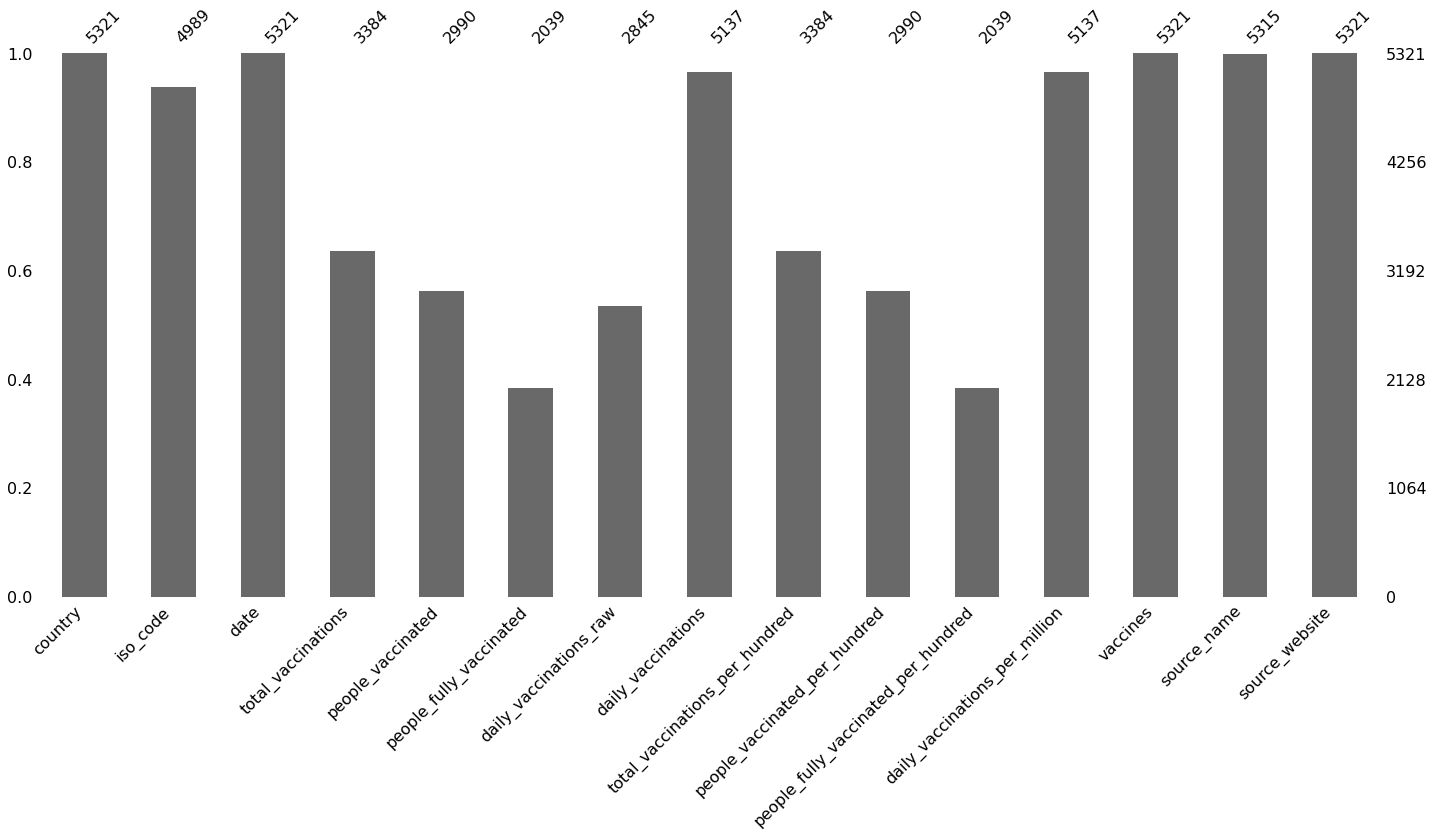

In [ ]:
msno.bar(covid);

Выводы по наполненности столбцов значениями не изменились, но стало очевиднее, с каким количеством данных в каждом столбце мы имеем дело.

Также высказывалось предположение, что часть столбцов сильно коррелирую друг с другом. Для оценки того, как сильно отсутствие одного значения влияет на остальные, можно построить корреляционную матрицу пустот.

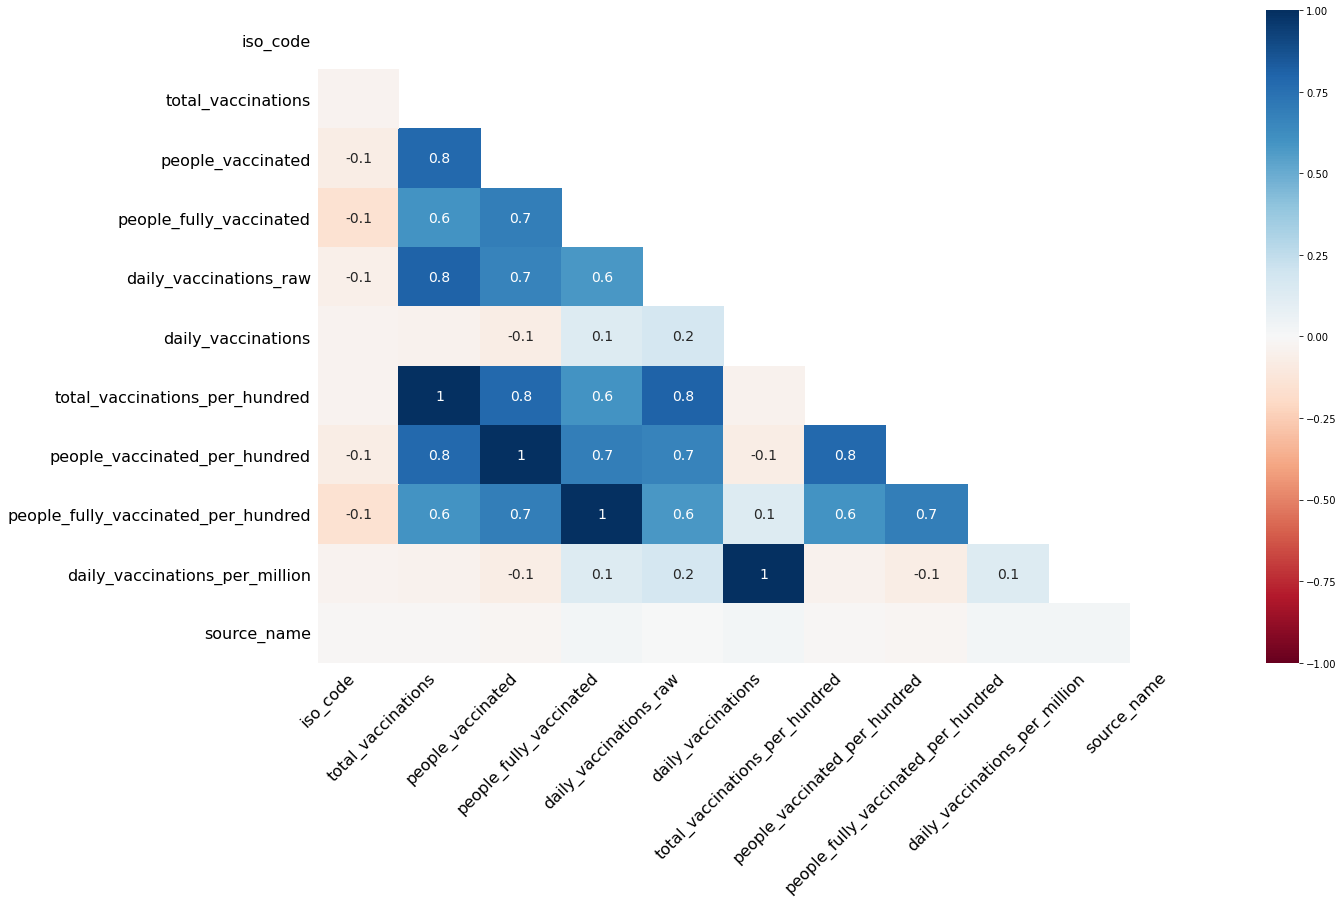

In [ ]:
msno.heatmap(covid);

Предположение подтвердилось. 4 столбца имеют коэффициент корреляции равный 1, следовательно, один из пары таких столбцов можно спокойно удалять. Разумеется тот, где данных меньше.

Произведем предобработку: удалим столбцы daily_vaccinations_raw, total_vaccinations_per_hundred, people_fully_vaccinated_per_hundred, people_vaccinated_per_hundred, daily_vaccinations_per_million.

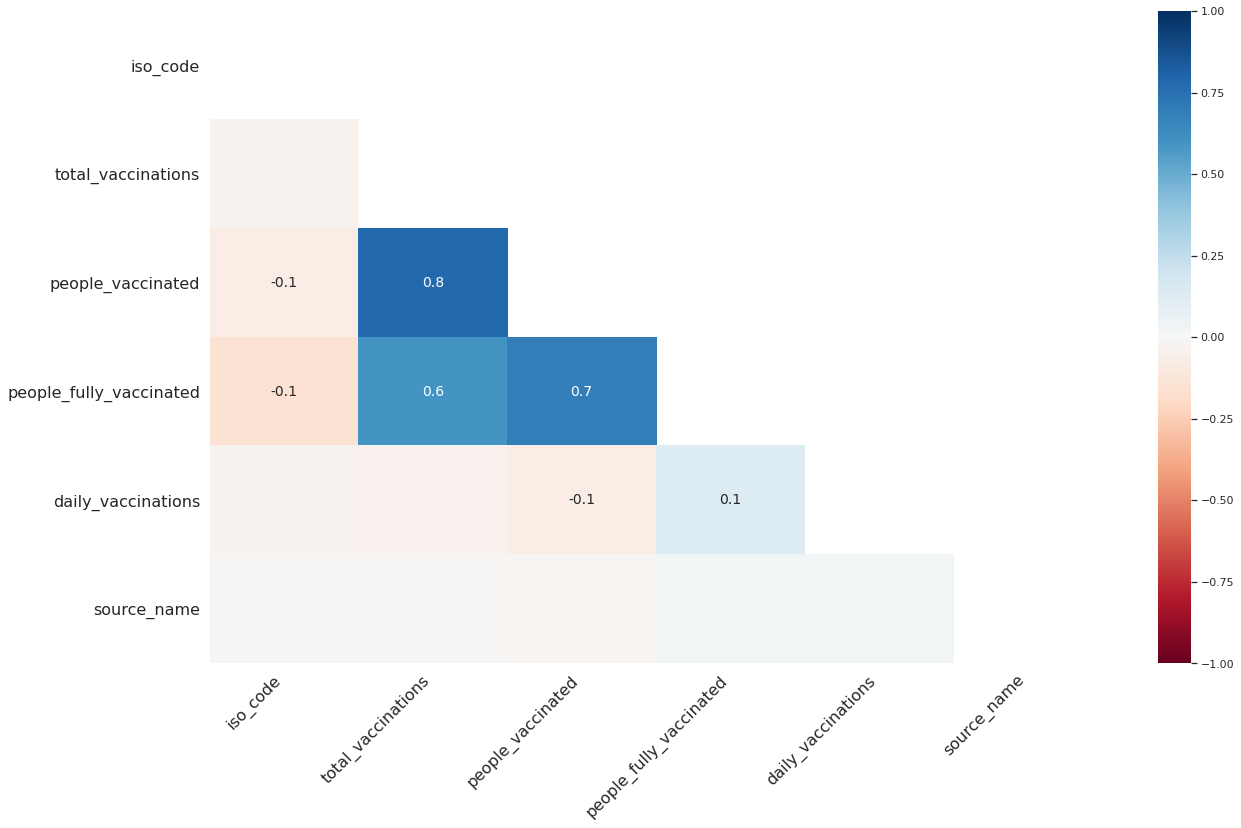

In [ ]:
covid = covid.drop(columns=["daily_vaccinations_raw", 
                            "total_vaccinations_per_hundred", 
                            "people_fully_vaccinated_per_hundred", 
                            "daily_vaccinations_per_million",
                            "people_vaccinated_per_hundred"])
msno.heatmap(covid);

Видим, что people_vaccinated-total_vaccinations и people_vaccinated-people_fully_vaccinated тоже сильно коррелируют. Хотелось бы что-то из этого удалить. Наиболее логичным видится удаление people_vaccinated.

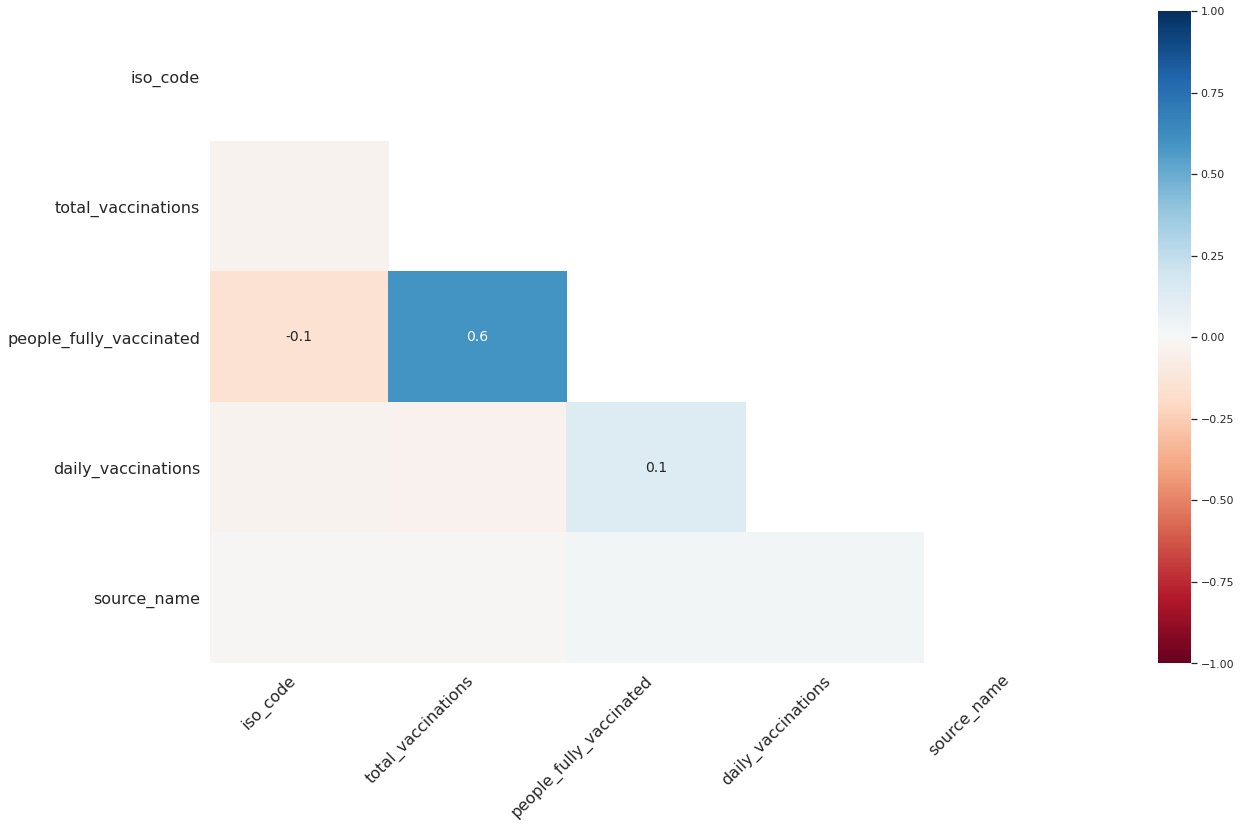

In [ ]:
covid = covid.drop(columns=["people_vaccinated"])
msno.heatmap(covid);

0.6 - вполне адекватная корреляция. Больше удалять ничего не будем. Посмотрим, что хранится в столбцах source_name, source_website и iso_code.

In [ ]:
print("iso_code:\n", covid["iso_code"].unique().tolist())
print("source_name:\n", covid["source_name"].unique().tolist())
print("source_website:\n", covid["source_website"].unique().tolist())

iso_code:
 ['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BMU', 'BOL', 'BRA', 'BGR', 'KHM', 'CAN', 'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', nan, 'EST', 'FRO', 'FLK', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GRL', 'GTM', 'GGY', 'GUY', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'IMN', 'ISR', 'ITA', 'JPN', 'JEY', 'JOR', 'KAZ', 'KWT', 'LVA', 'LBN', 'LIE', 'LTU', 'LUX', 'MAC', 'MYS', 'MDV', 'MLT', 'MUS', 'MEX', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MMR', 'NPL', 'NLD', 'NZL', 'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'RWA', 'SHN', 'SMR', 'SAU', 'SEN', 'SRB', 'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'KOR', 'ESP', 'LKA', 'SWE', 'CHE', 'THA', 'TTO', 'TUR', 'TCA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'VEN', 'ZWE']
source_name:
 ['Ministry of Health', 'Government of Andorra', 'Government of Australia via covidlive.com.au', 'Government of Azerba

iso_code нам пригодится для построения карт, а в source_website хранятся ссылки. Можно смело удалить. В source_name хранится какая-то интересная информация. Например, данные могут быть предоставлены государственной или коммерческой организацией - можно сделать выводы.

In [ ]:
covid = covid.drop(columns=["source_website"])
covid.shape

(5321, 7)

Сократили количество столбцов в два раза - неплохо.

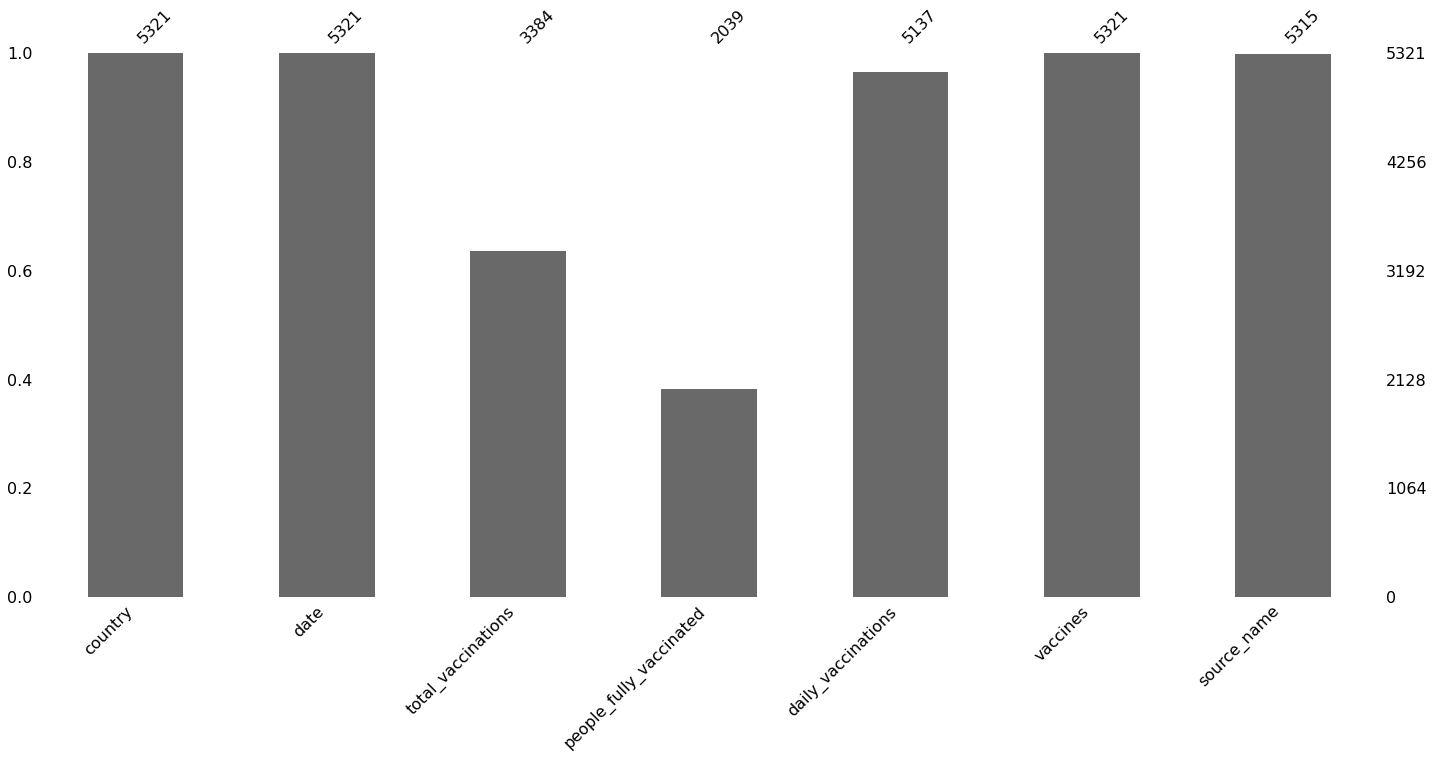

In [ ]:
msno.bar(covid);

Отсутствующие значения в текущем датасете есть в следующих столбцах:
1. total_vaccinations - логично заменить на медиану по стране.
2. people_fully_vaccinated - логично заменить на медиану по стране.
3. daily_vaccinations - логично заменить на медиану по стране.
4. source_name - имеет смысл посмотреть, для каких стран значения отсутствуют и на основании этого принять решение о том, чем заполнять столбцы.

In [ ]:
import numpy as np

In [ ]:
for i in covid.country.unique():
  print(i, 
        covid["total_vaccinations"].loc[covid["country"] == i].median(), 
        covid["people_fully_vaccinated"].loc[covid["country"] == i].median(), 
        covid["daily_vaccinations"].loc[covid["country"] == i].median())

Albania 534.0 611.0 71.5
Algeria 30.0 nan 3748.0
Andorra 1622.0 nan 66.0
Anguilla 2051.5 nan 149.0
Argentina 524240.5 229112.5 13321.5
Australia 12204.0 nan 4556.0
Austria 298195.0 62123.0 12687.0
Azerbaijan 179180.0 nan 6112.0
Bahrain 60393.0 199374.0 7712.0
Bangladesh 1586368.0 nan 104318.0
Barbados 23807.5 nan 2451.0
Belarus 10472.0 nan 403.0
Belgium 335606.5 158199.0 15835.0
Belize 673.0 nan 208.0
Bermuda 10000.0 4769.0 456.0
Bolivia 3560.0 9700.0 491.0
Brazil 3970269.5 1056807.0 211824.0
Bulgaria 50124.0 19150.0 2273.0
Cambodia 10435.5 nan 871.0
Canada 816451.0 155503.0 25163.0
Cayman Islands 17005.0 6942.0 275.0
Chile 67380.0 24942.0 6163.0
China 18883500.0 nan 631579.0
Colombia 66157.0 nan 8452.0
Costa Rica 52914.5 20100.5 2007.0
Croatia 74992.0 52778.0 2641.5
Cyprus 32837.0 14837.0 1104.0
Czechia 277793.0 132772.0 11574.0
Denmark 261543.0 150181.5 9220.0
Dominican Republic 20332.0 nan 3970.0
Ecuador 8190.0 6228.0 462.0
Egypt 657.5 nan 219.0
El Salvador 6000.0 nan 1200.0
England

Видим, что есть страны, где среднее значение по столбцу - nan, эти случаи можно заменить на 0.

In [ ]:
for i in covid.index.values:
  if pd.isnull(covid["total_vaccinations"][i]):
    covid.at[i, "total_vaccinations"] = np.nanmedian(covid["total_vaccinations"].loc[covid["country"] == covid["country"][i]])
  if pd.isnull(covid["people_fully_vaccinated"][i]):
    if not any(covid["people_fully_vaccinated"].loc[covid["country"] == covid["country"][i]]):
      covid.at[i, "people_fully_vaccinated"] = np.nanmedian(covid["people_fully_vaccinated"].loc[covid["country"] == covid["country"][i]])
    else:
      covid.at[i, "people_fully_vaccinated"] = 0
  if pd.isnull(covid["daily_vaccinations"][i]):
    if not any(covid["daily_vaccinations"].loc[covid["country"] == covid["country"][i]]):
      covid.at[i, "daily_vaccinations"] = np.nanmedian(covid["daily_vaccinations"].loc[covid["country"] == covid["country"][i]])
    else:
      covid.at[i, "daily_vaccinations"] = 0

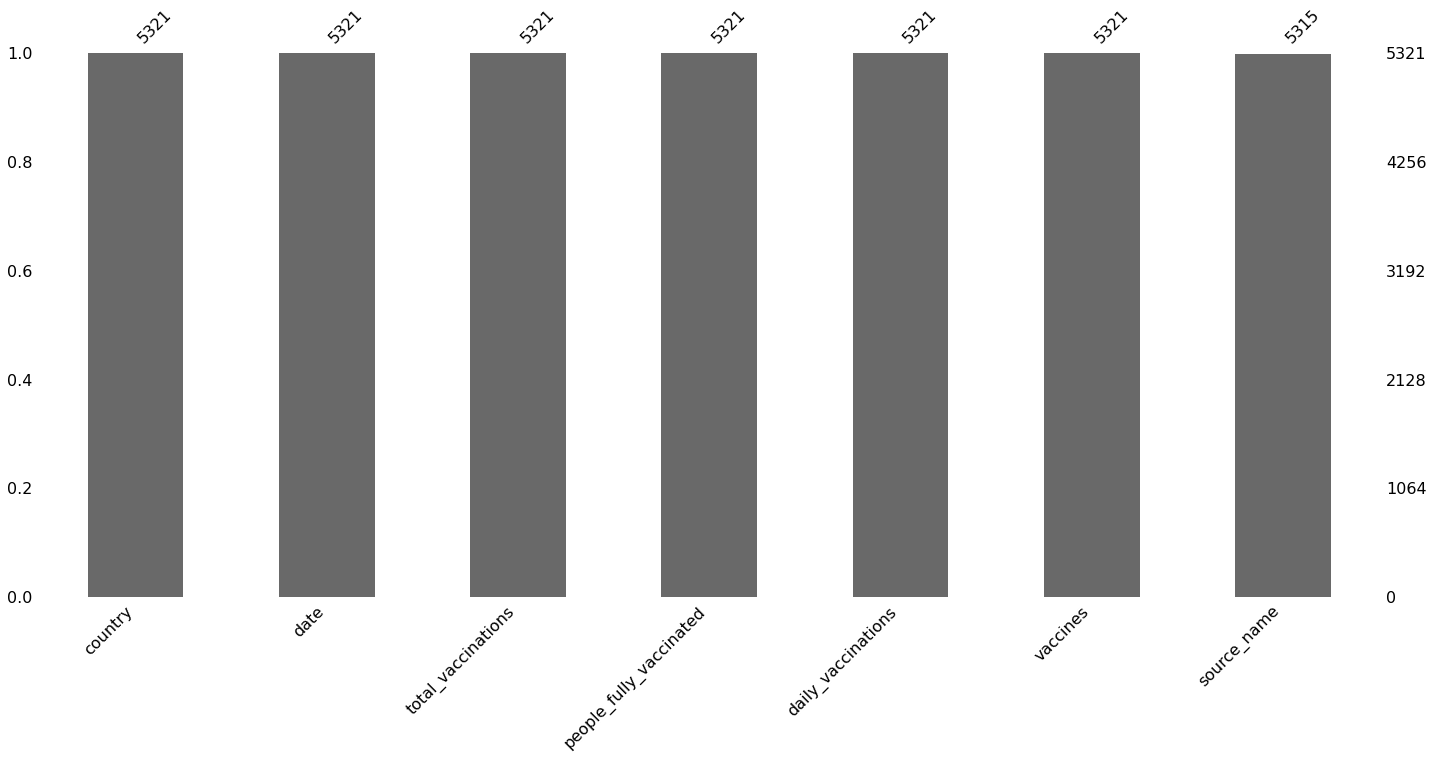

In [ ]:
msno.bar(covid);

Пустых значений в числовых столбцах нет, займемся последним.

In [ ]:
covid.country.loc[pd.isnull(covid["source_name"])].tolist()

['Belize', 'Belize', 'Belize', 'Belize', 'Belize', 'Belize']

6 записей и все про Белиз. Сколько всего записей про Белиз?

In [ ]:
covid.query("country == 'Belize'")

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,vaccines,source_name,source_website
571,Belize,BLZ,2021-02-28,0.0,0.0,0.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...
572,Belize,BLZ,2021-03-01,673.0,0.0,208.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...
573,Belize,BLZ,2021-03-02,417.0,0.0,208.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...
574,Belize,BLZ,2021-03-03,673.0,0.0,224.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...
575,Belize,BLZ,2021-03-04,817.0,0.0,204.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...
576,Belize,BLZ,2021-03-05,996.0,0.0,199.0,Oxford/AstraZeneca,NaN,https://www.facebook.com/1410454029253008/post...


Всего про Белиз 6 записей. Можно заменить на Unknown, т.к. у нас действительно нет никаких вероятных данных для замены.

In [ ]:
covid.loc[covid.country == "Belize", "source_name"] = "Unknown"

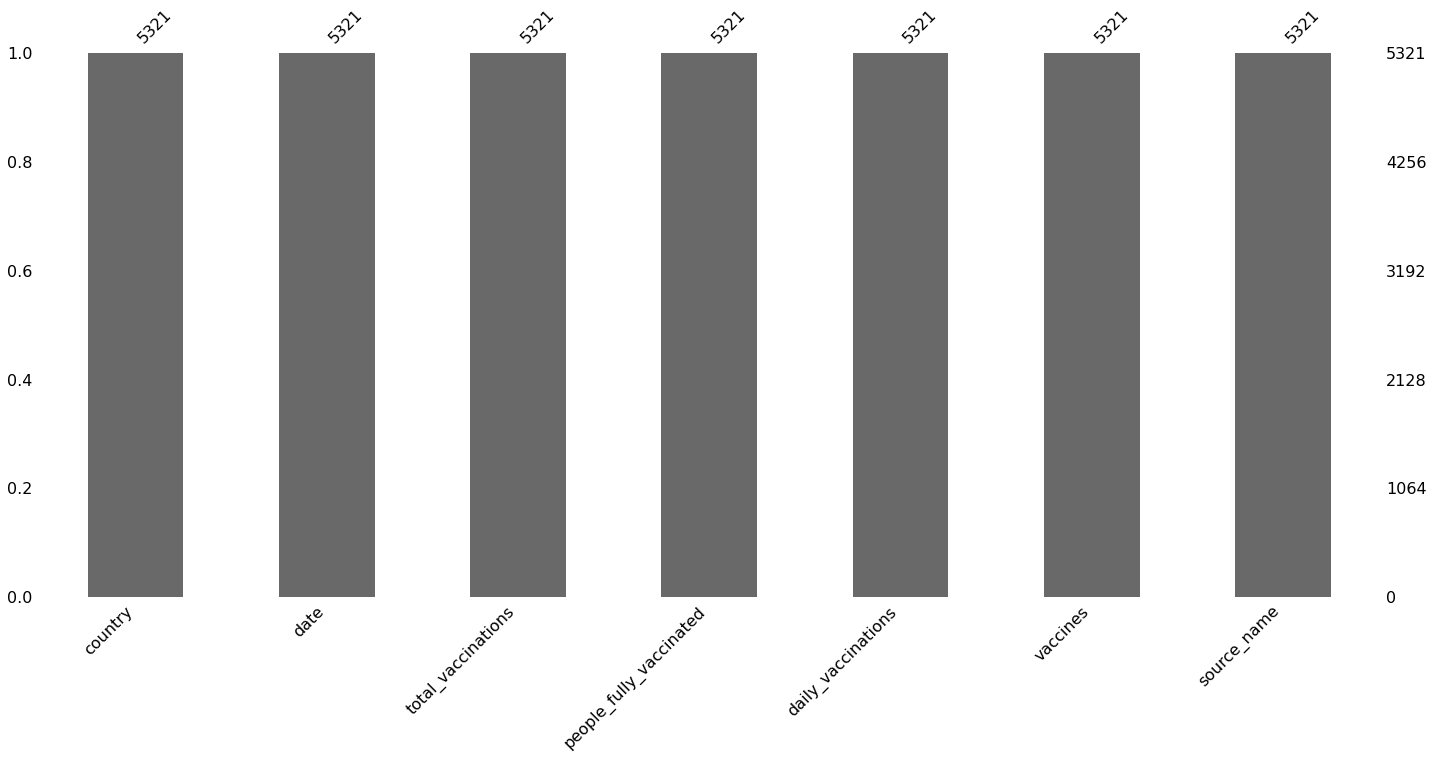

In [ ]:
msno.bar(covid);


> **В качестве тренировочного задания можете оценить значений в текстовых столбцах и произвести соответствующую нормализацию, если она необходима.**



## Распределение данных

Традиционно гистограмма визуализирует некоторое распределение значений. Просто уметь читать ее - хорошо, но еще лучше понимать, какой у нее смысл с точки зрения математики. По тому, какая у вас получилась гистограмма, можно сделать некоторые статистические выводы о данных.

Наиболее часто встречающиеся распределения при визуализации (не в теории случайных процессов):


*   нормальное распределение
*   равномерное распределение
*   распределение Бернулли
*   экспоненциальное распределение
*   распределение Лапласа


Про то, что и как оценивается этими распределениями и многими другими (не вдаваясь в математику), подробно можно почитать вот [тут](http://sixsigmaonline.ru/baza-znanij/tipy-raspredelenij-i-sootvetstvuyushchie-im-gistogrammy).

Попробовать углубиться в теорию случайных процессов можно [тут](https://kms.kpfu.ru/sites/default/files/various/ЭОР/Кареев%20И.А.%20Лекции%20по%20теории%20случайных%20процессов.pdf).

Неплохой [пример](https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802) на оценку распределения данных в процессе анализа.



> **Гипотеза** - некоторое предположение о данных, основанное на здравом смысле и уже имеющихся знаниях о данных.



**Гипотеза 1.** Количество ежедневных вакцинаций в странах с максимальным числом вакцинаций растет экспоненциально.

Найдем страны с максимальным числом вакцинаций (total_vaccinations).

Для визуализации воспользуемся модулем [seaborn](http://seaborn.pydata.org/index.html).

In [ ]:
import seaborn as sns

In [ ]:
maxes = {country: covid.total_vaccinations.loc[covid["country"] == country].max() for country in covid["country"].unique()}

In [ ]:
tv = pd.DataFrame.from_dict(data={"Country": list(maxes.keys()), "Total vaccinations": list(maxes.values())})

In [ ]:
tvm = tv.sort_values(by=["Total vaccinations"], ascending=False).head(15).reset_index(drop=True)

In [ ]:
tvm

,Country,Total vaccinations
0,United States,87912323.0
1,China,52520000.0
2,United Kingdom,22887118.0
3,India,20922344.0
4,England,19258271.0
5,Brazil,10576542.0
6,Turkey,9883607.0
7,Israel,8645523.0
8,Germany,7326098.0
9,Russia,6583873.0


Табличка - хорошо, визуализация - лучше.

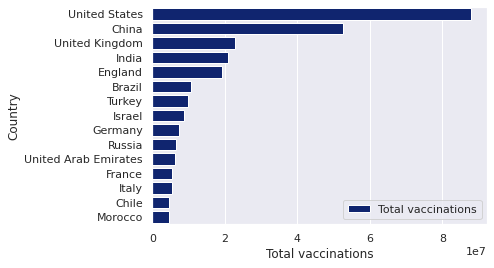

In [ ]:
sns.set_theme(style="darkgrid")
plt.plot()
sns.set_color_codes("dark")
sns.barplot(x="Total vaccinations", y="Country", data=tvm, label="Total vaccinations", color="b");
plt.legend(ncol=1);

Внесем разнообразие: сделаем визуализацию роста количества вакцинаций с помощью [plotly](https://plotly.com).

In [ ]:
us = covid[["daily_vaccinations", "date"]].loc[covid["country"] == "United States"].reset_index(drop=True).reset_index()
ch = covid[["daily_vaccinations", "date"]].loc[covid["country"] == "China"].reset_index(drop=True).reset_index()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(us, y="daily_vaccinations", x="date", title="Vaccination number groth in the US")
fig.show()

Как видим, экспоненциального роста нет - гипотеза не подтвердилась.

Посмотрим на распределение числа ежедневных вакцинаций в США.

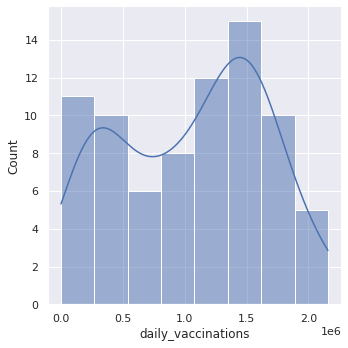

In [ ]:
sns.displot(us, x="daily_vaccinations", kde=True);

Распределение больше похоже на распределение Пуассона, чем на нормальное.

## Ранжирование

Посмотрим, как можно построить облако слов с помощью Python. Для этого есть забавная библиотека [wordcloud](https://amueller.github.io/word_cloud/). Самый минималистичный пример ее работы.

In [ ]:
from wordcloud import WordCloud

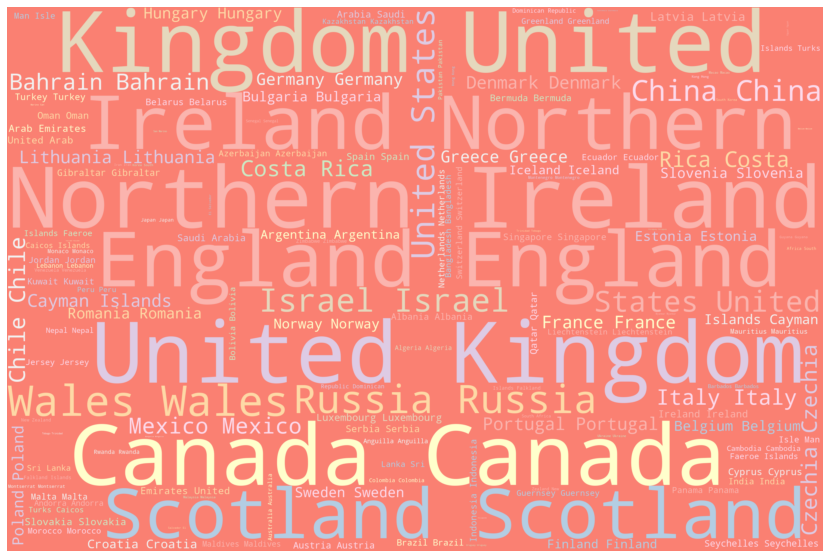

In [ ]:
text = " ".join(covid["country"].tolist())
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=True).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Отношение части к целому

Круговая диаграмма без центра - "пончик". Размер одной категории считается не по площади фигуры, а по периметру круга.

In [ ]:
vac = {v: covid.vaccines.tolist().count(v) for v in covid.vaccines.unique()}
labels = list(vac.keys())
values = list(vac.values())

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

## Развитие событий

Обычный график функции был выше, построим график с областями. Визуализируем количество вакцинаций в США и Китае.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=us["date"], y=us["daily_vaccinations"], fill="tozeroy"))
fig.add_trace(go.Scatter(x=ch["date"], y=ch["daily_vaccinations"], fill="tonexty"))
fig.show()